In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
dh = pd.read_csv(r"F:\dektop241205\health_app\biabitese2\diabetes.csv")
dh.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:

q1 = dh["Insulin"].quantile(0.25)
q3 = dh["Insulin"].quantile(0.80)
iqr = q3-q1
minrange = q1-(1.6*iqr)
maxrange = q3+(1.6*iqr)
minrange,maxrange

(-240.0, 390.0)

In [4]:
dh = dh[dh["Insulin"] <= maxrange]

In [5]:
q1 = dh["DiabetesPedigreeFunction"].quantile(0.25)
q3 = dh["DiabetesPedigreeFunction"].quantile(0.86)
iqr = q3-q1
minrange = q1-(1.6*iqr)
maxrange = q3+(1.6*iqr)
minrange,maxrange


(-0.6022919999999998, 1.6179119999999998)

In [6]:
dh = dh[dh["DiabetesPedigreeFunction"] <= 1.4]
dh = dh[dh["DiabetesPedigreeFunction"] >= minrange]



In [7]:
q1 = dh["Pregnancies"].quantile(0.25)
q3 = dh["Pregnancies"].quantile(0.86)
iqr = q3-q1
minrange = q1-(1.6*iqr)
maxrange = q3+(1.6*iqr)
minrange,maxrange

(-10.200000000000001, 19.200000000000003)

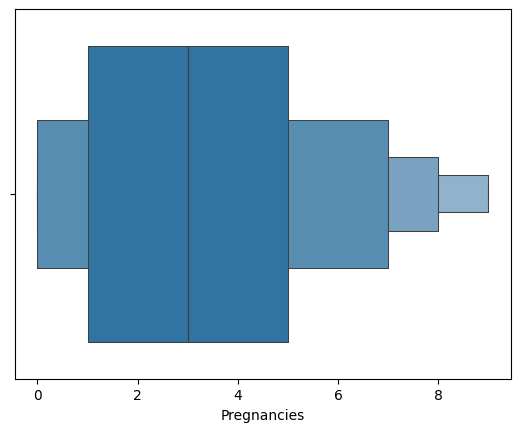

In [8]:
dh = dh[dh["Pregnancies"] <= 9.76]

sn.boxenplot(x ="Pregnancies",data=dh)
plt.show()

In [9]:
q1 = dh["BMI"].quantile(0.25)
q3 = dh["BMI"].quantile(0.86)
iqr = q3-q1
minrange = q1-(1.6*iqr)
maxrange = q3+(1.6*iqr)

minrange,maxrange

(7.5099999999999945, 58.540000000000006)

In [10]:
newdh = dh[dh["BMI"] <= 50]



In [11]:
dh = newdh

In [12]:
dh.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000
mean,3.252226,119.133531,68.639466,19.977745,67.823442,31.525668,0.447223,32.364985,0.323442
std,2.647470,31.700727,19.148570,15.688492,86.699529,7.416309,0.275582,11.608408,0.468137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.825000,0.239250,24.000000,0.000000
50%,3.000000,114.000000,71.000000,22.000000,22.500000,31.600000,0.365000,28.000000,0.000000
75%,5.000000,137.000000,80.000000,32.000000,120.000000,35.900000,0.604000,38.000000,1.000000
max,9.000000,199.000000,122.000000,99.000000,387.000000,50.000000,1.400000,81.000000,1.000000


In [13]:
newdh = dh[dh["SkinThickness"] <= 50]



In [14]:
dh = newdh

In [15]:
dh.shape

(668, 9)

In [16]:
dh.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0


In [17]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [18]:
x = dh.drop(columns="Outcome",axis=1)
y = dh["Outcome"]

In [19]:
x = scale.fit_transform(x)

In [20]:
# from sklearn.model_selection import train_test_split
# from sklearn import svm
# from sklearn.metrics import accuracy_score
# randomstate = 0
# best_score = 0
# for randomstate in range(1, 1001):
#     x_train, x_test, y_train, y_test = train_test_split(
#         x, y, test_size=0.2, random_state=randomstate, stratify=y
#     )
#     clasifirer = svm.SVC(kernel="linear")
#     clasifirer.fit(x_train, y_train)
#     accuracyScoe_x_test = clasifirer.predict(x_test)
#     score = accuracy_score(accuracyScoe_x_test, y_test)
#     if score > best_score:
#         best_score = score
#         best_randomstate = randomstate
# print(f"best random state:{best_randomstate}")
# print(f"best score:{best_score}")
# best random state:197
# best score:0.8805970149253731

In [21]:
# from sklearn.preprocessing import MinMaxScaler

In [22]:
# ms = MinMaxScaler()
# ms.fit(x)

In [23]:
# x = ms.transform(x)

In [24]:
# from sklearn.model_selection import train_test_split
# from sklearn import svm
# from sklearn.linear_model import  LinearRegression
# from sklearn.metrics import r2_score
# randomstate = 0
# best_score = float('-inf')  # Use -inf to ensure the first score is higher
# for randomstate in range(1, 1001):
#     x_train, x_test, y_train, y_test = train_test_split(
#         x, y, test_size=0.2, random_state=randomstate, stratify=y
#     )
#     clasifirer = LinearRegression()
#     clasifirer.fit(x_train, y_train)
#     predictions = clasifirer.predict(x_test)
#     score = r2_score(y_test, predictions) # Use R² Score for regression

#     if score > best_score:
#             best_score = score
#             best_randomstate = randomstate

# print(f"Best random state: {best_randomstate}")
# print(f"Best R² score: {best_score}")
# Best random state: 63
# Best R² score: 0.48094392937129615

In [30]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression

x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.2, random_state=63, stratify=y
    )
clasifirer = LogisticRegression()
clasifirer.fit(x_train, y_train)


LogisticRegression()

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn import svm
# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression
# randomstate = 0
# best_score = 0
# for randomstate in range(1, 1001):
#     x_train, x_test, y_train, y_test = train_test_split(
#         x, y, test_size=0.2, random_state=randomstate, stratify=y
#     )
#     clasifirer = LogisticRegression()
#     clasifirer.fit(x_train, y_train)
#     accuracyScoe_x_test = clasifirer.predict(x_test)
#     score = accuracy_score(accuracyScoe_x_test, y_test)
#     if score > best_score:
#         best_score = score
#         best_randomstate = randomstate
# print(f"best random state:{best_randomstate}")
# print(f"best score:{best_score * 100}")

best random state:63
best score:88.05970149253731


In [31]:
import pickle
with open("diabitese2.sav","wb") as f:
    pickle.dump(clasifirer,f)